In [208]:
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots
import re

def extract_depth_entropy(data, total_depth, chi=-1):
    depth_entropy = []
    # depth_entropy.append((0, 0))
    depth_set = set()
    for line in data:
        # chi can be negative
        chi_pattern = re.compile(r'chi=(\-?\d+)')
        chi_line = int(chi_pattern.findall(line)[0])
        if chi_line == chi:
            depth_pattern = re.compile(r'depth=(\d+)')
            depth = int(depth_pattern.findall(line)[0])
            if depth > total_depth:
                break
            # S_A can be in scientific notation
            S_A_pattern = re.compile(r'S_A=(\-?\d+\.\d+e\-\d+|\-?\d+\.\d+)')
            # S_A_pattern = re.compile(r'S_A=(\-?\d+\.\d+)')
            S_A = float(S_A_pattern.findall(line)[0])
            # append only if the depth is not already in the list somewhere
            if depth not in depth_set:
                depth_entropy.append((depth, S_A))
            depth_set.add(depth)
    return depth_entropy


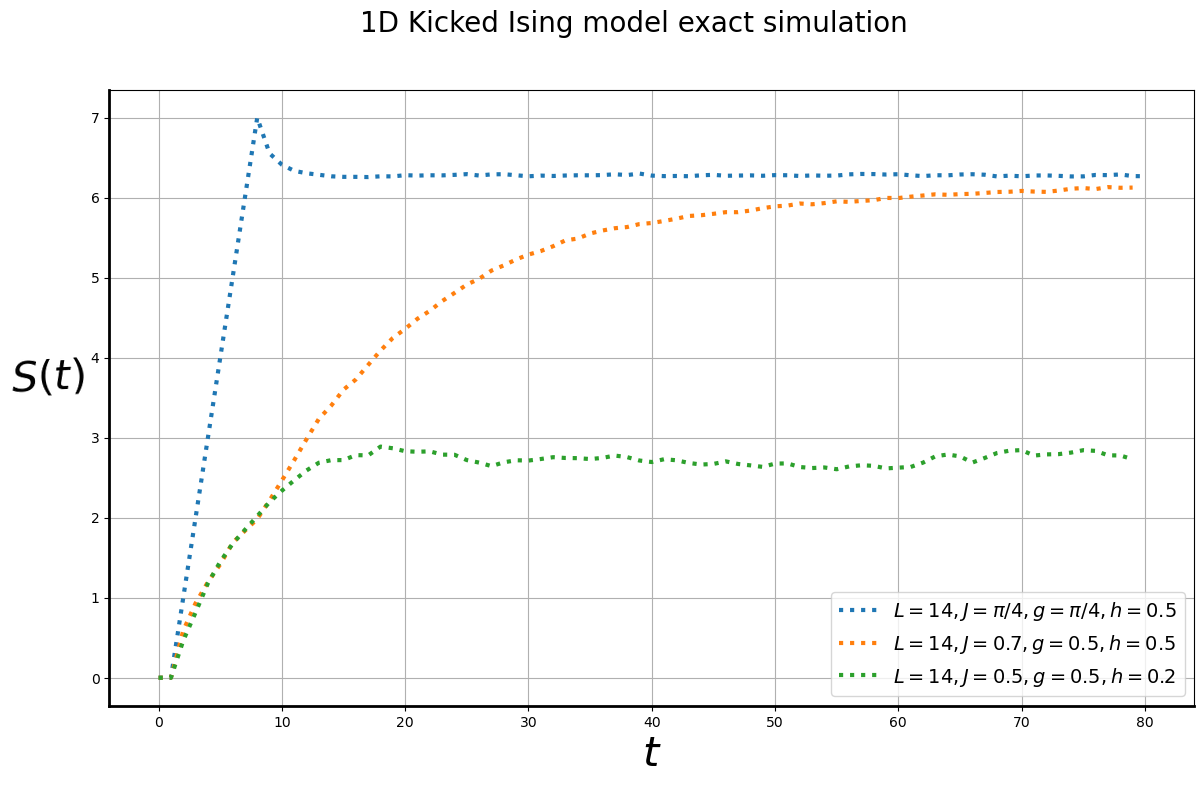

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
# make sure the colors for same chi are the same, and distinguishable for different chi
# color_list = ['blue', 'red', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

total_depth = 80

J=np.pi/4
g=np.pi/4
h=0.5
n_list = [14]

for n in n_list:
        exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
        exact_data = exact_file.readlines()
        exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
        depth, S_A = zip(*exact_depth_entropy)
        ax.plot(depth, S_A, label=f'$L={n},J=\pi/4,g=\pi/4,h={h}$', linestyle=':', linewidth=3.0)

J=0.7
g=0.5
h=0.5
n_list = [14]

for n in n_list:
        exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
        exact_data = exact_file.readlines()
        exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
        depth, S_A = zip(*exact_depth_entropy)
        ax.plot(depth, S_A, label=f'$L={n},J={J},g={g},h={h}$', linestyle=':', linewidth=3.0)

J = 0.5
g = 0.5
h = 0.2
n_list = [14]

for n in n_list:
        exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
        exact_data = exact_file.readlines()
        exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
        depth, S_A = zip(*exact_depth_entropy)
        ax.plot(depth, S_A, label=f'$L={n},J={J},g={g},h={h}$', linestyle=':', linewidth=3.0)

ax.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
ax.set_xlabel(r'$t$', fontsize=30)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.legend(fontsize=14)
plt.grid()
fig.suptitle(f'1D Kicked Ising model exact simulation', fontsize=20)
# plt.savefig(f'MBL.png', dpi=300)
plt.show()

./exact_n=6_J=0.2_g=0.2_h=0.2.txt not found
./MPS_n=6_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=6_J=0.2_g=0.2_h=0.2.txt not found
./MPS_n=8_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=8_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=10_J=0.2_g=0.2_h=0.2.txt not found
./MPS_n=12_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=12_J=0.2_g=0.2_h=0.2.txt not found
./MPS_n=14_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=14_J=0.2_g=0.2_h=0.2.txt not found
./exact_n=16_J=0.2_g=0.2_h=0.2.txt not found
./MPS_n=16_J=0.2_g=0.2_h=0.2.txt not found
./TNfunc_y_n=16_J=0.2_g=0.2_h=0.2.txt not found


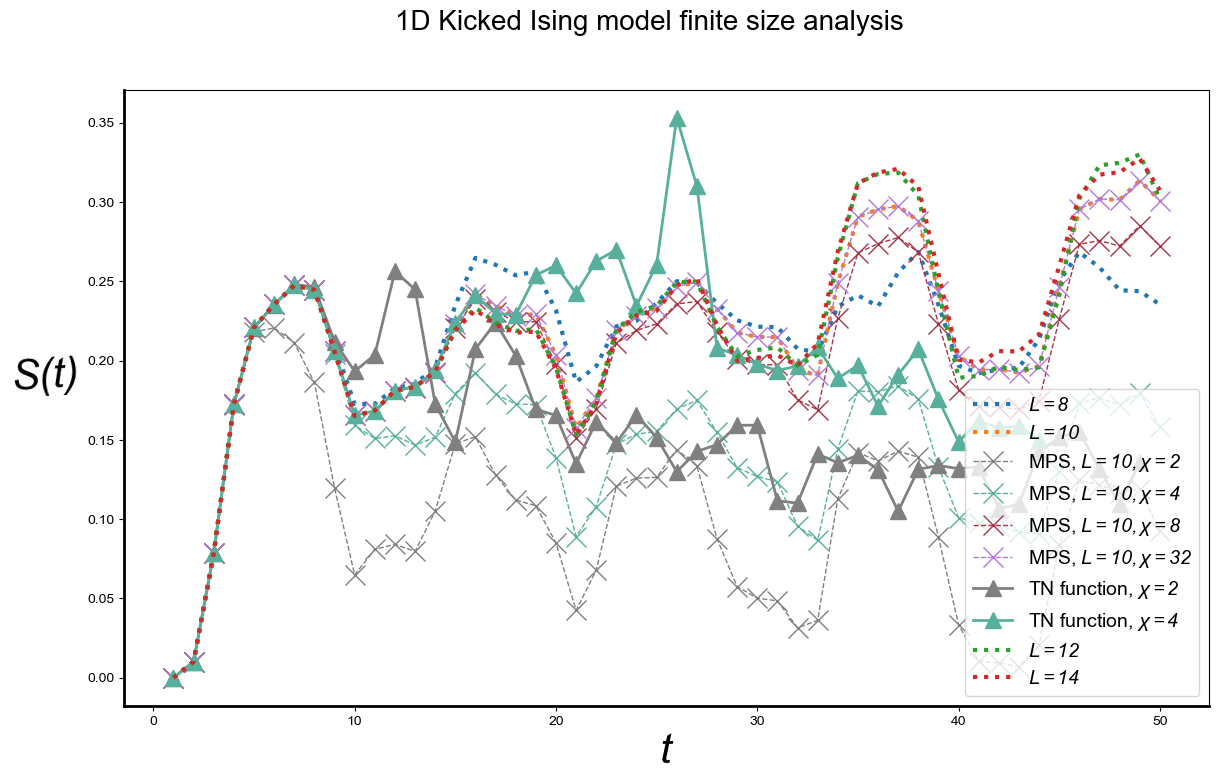

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
# make sure the colors for same chi are the same, and distinguishable for different chi
J=0.2
g=0.2
h=0.2
n_list = [6,8,10,12,14,16]
# n_list = [10]
chi_mps_list = [2, 4, 8, 32]
color_list = ['#808080','#58B09C','#A63446','#B177DE']

for n in n_list:
        total_depth = 100
        try:
                exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
                exact_data = exact_file.readlines()
                exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
                depth, S_A = zip(*exact_depth_entropy)
                ax.plot(depth, S_A, label=f'$L={n}$', linestyle=':', linewidth=3.0)
                
        except:
                print(f'./exact_n={n}_J={J}_g={g}_h={h}.txt not found')
        try:
                mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
                mps_data = mps_file.readlines()
                for chi_mps in chi_mps_list:
                        mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
                        depth, S_A = zip(*mps_depth_entropy)
                        ax.plot(depth, S_A, label=f'MPS, $L={n},\chi={chi_mps}$', linestyle='--',color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)
        except:
                print(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt not found')
        try:
                TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')
                TNfunc_y_data = TNfunc_y_file.readlines()
                for chi_func in chi_mps_list:
                        TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
                        depth, S_A = zip(*TNfunc_y_depth_entropy)
                        ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_mps_list.index(chi_func)], marker='^', markersize=12)
        except:
                print(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt not found')
        
# J=np.pi/4
# g=np.pi/4
# h=0.5
# n_list = [6,8,10,12,14,16]

# for n in n_list:
#         total_depth = 15
#         exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
#         exact_data = exact_file.readlines()
#         exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
#         depth, S_A = zip(*exact_depth_entropy)
#         ax.plot(depth, S_A, label=f'$L={n}$', linestyle=':', linewidth=3.0)

ax.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
ax.set_xlabel(r'$t$', fontsize=30)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.legend(fontsize=14)
# plt.grid()
fig.suptitle(f'1D Kicked Ising model finite size analysis', fontsize=20)
# plt.savefig(f'MBL.png', dpi=300)
plt.show()

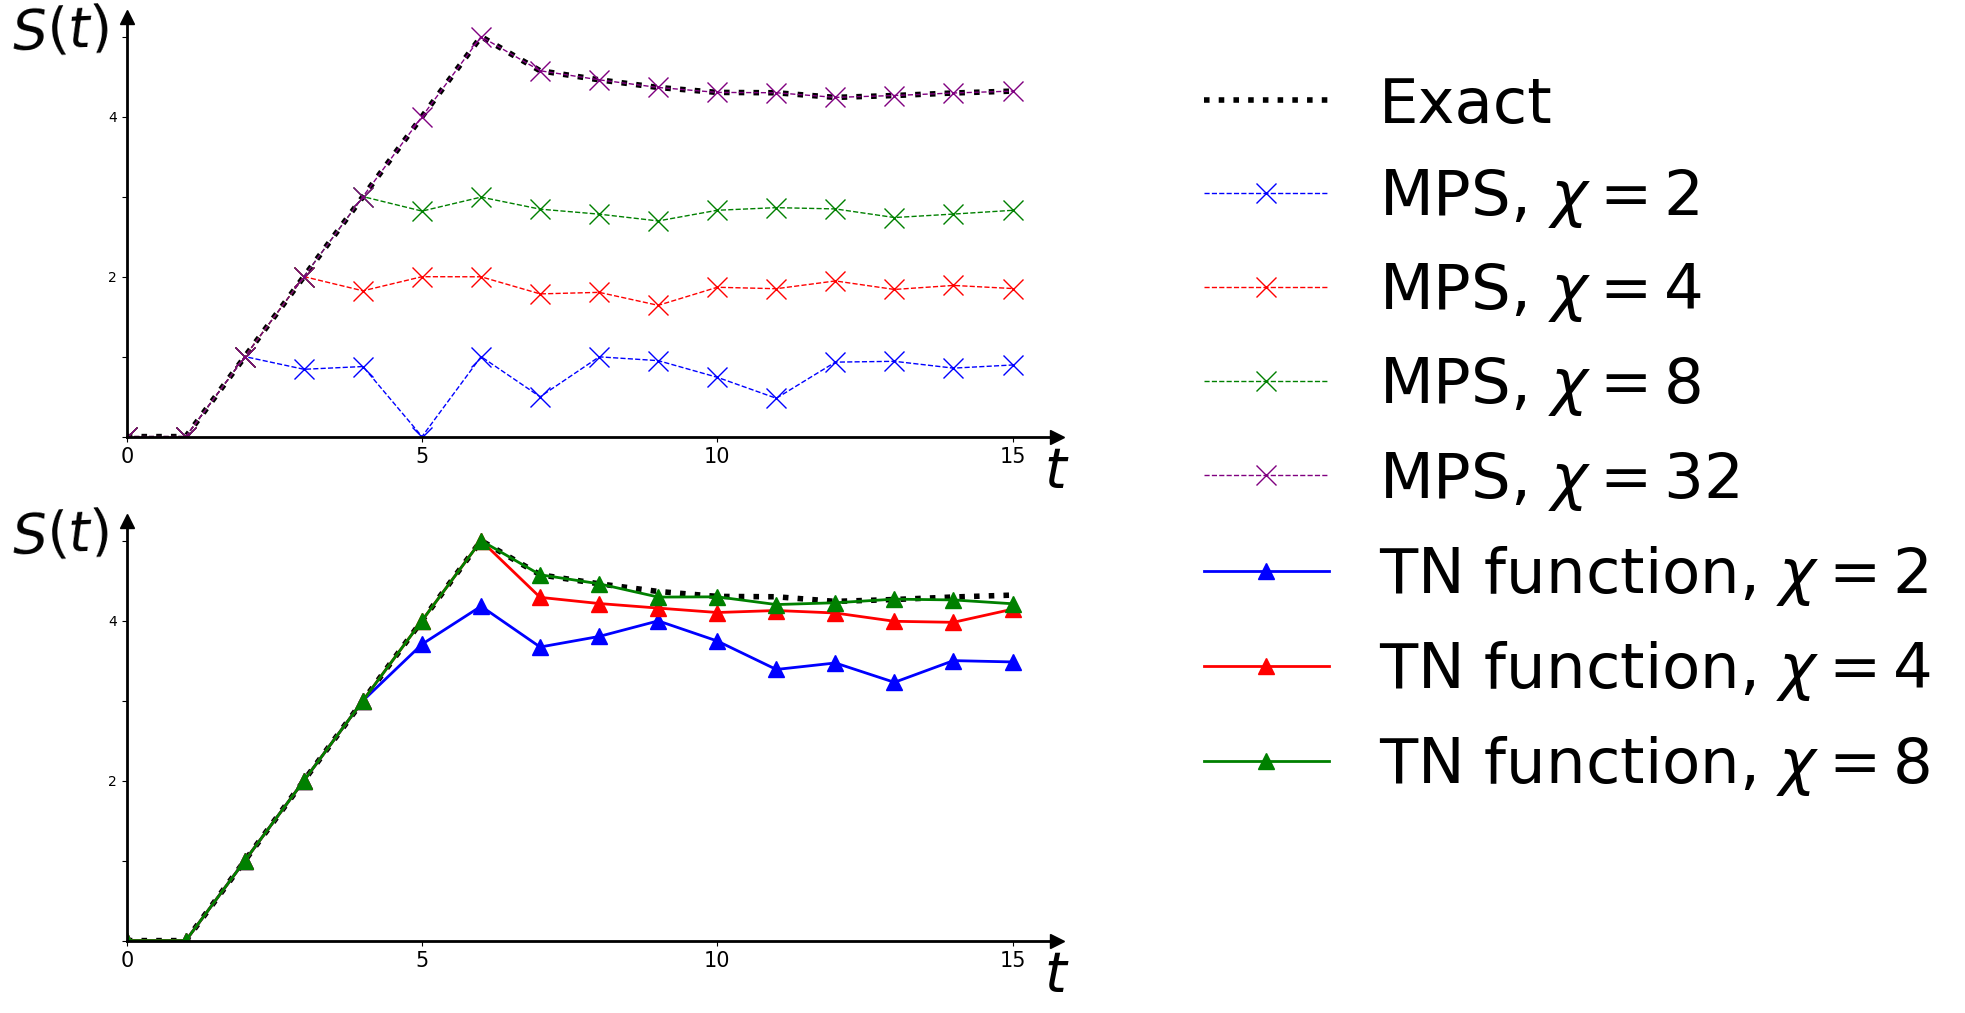

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

J=np.pi/4
g=np.pi/4
h=0.5
n=10

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
# TNfunc_data = TNfunc_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()


exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# plot the entanglement entropy dynamics
chi_func_list = [2, 4, 8]
chi_mps_list = [2, 4, 8, 32]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[0].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=4.0)


for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax[0].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)

for chi_func in chi_func_list:
    # TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    # depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[0].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax[0].plot([], [], label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)

J=np.pi/4
g=np.pi/4
h=0.5
n=10

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_data = TNfunc_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()


exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# plot the entanglement entropy dynamics
chi_func_list = [2, 4, 8]
chi_mps_list = [2, 8, 32]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[1].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=4.0)
for chi_func in chi_func_list:
    # TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    # depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax[1].plot(depth, S_A, label=f'TN function-y, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)
# for chi_mps in chi_mps_list:
#     mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
#     depth, S_A = zip(*mps_depth_entropy)
#     ax[1].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)



for axi in ax:
    axi.set_ylabel(r'$S(t)$', fontsize=40, rotation=np.pi, labelpad=30)
    axi.yaxis.set_label_position("left")
    axi.yaxis.set_label_coords(-0.07, 0.9)
    axi.set_xlabel(r'$t$', fontsize=40)
    axi.xaxis.set_label_coords(1.0, -0.02)
    axi.set_xticks([0, 5, 10, 15])
    axi.set_yticks(list(range(6)))
    axi.set_yticklabels(['','',2,'',4,''])
    axi.tick_params(axis='x', labelsize=15)

    # x axis just arrow, no ticks
    # axi.set_xticks([])
    # axi.set_yticks([])
    # axis width
    axi.spines['bottom'].set_linewidth(2)
    axi.spines['left'].set_linewidth(2)
    # axi.spines['bottom'].set_position(('data', 0))
    # axi.spines['bottom'].set_bounds(0, 30)
    # axi.spines['left'].set_bounds(0, 5.5)
    # add arrow to the right end of x axis
    axi.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=axi.get_yaxis_transform(), clip_on=False)
    axi.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=axi.get_xaxis_transform(), clip_on=False)

    # frameless
    axi.spines['top'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_position(('data', 0))
    axi.spines['bottom'].set_position(('data', 0))
    axi.set_xlim(0, 15.75)
    axi.set_ylim(0, 5.25)


ax[0].legend(loc='right', bbox_to_anchor=(2.0, 0.0), ncol=1, fontsize=45, frameon=False)
# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

# plt.savefig(f'compare-y.pdf', bbox_inches='tight',dpi=300)
plt.show()

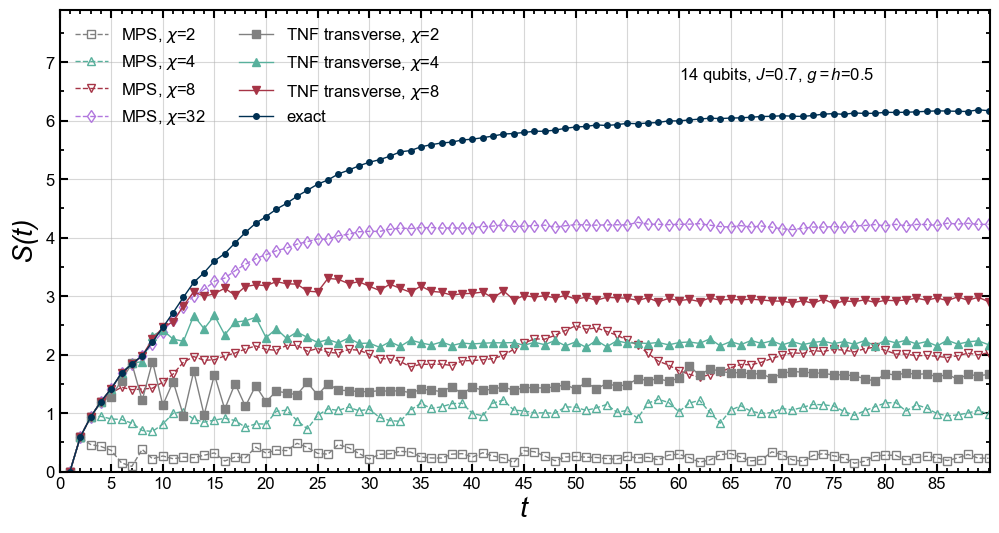

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Arial:italic'
# mathtext change to stix math font
# plt.rcParams['mathtext.bf'] = 'stix:italic'
plt.rcParams['mathtext.it'] = 'stix:italic'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.sf'] = 'Arial:italic'
plt.rcParams['mathtext.tt'] = 'Arial'
plt.rcParams['font.family'] = 'Arial'


J=0.7
g=0.5
h=0.5
n=14

total_depth = 90

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_data = TNfunc_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

# exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# # TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

# exact_data = exact_file.readlines()
# mps_data = mps_file.readlines()
# # TNfunc_data = TNfunc_file.readlines()
# TNfunc_y_data = TNfunc_y_file.readlines()
color_list = ['#808080','#58B09C','#A63446','#B177DE']
marker_list = ['s','^','v','d']

chi_mps_list = [2, 4, 8, 32]
chi_func_list = [2, 4, 8]
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax.plot(depth, S_A, label=r'MPS, $\mathbf{\chi}$' + f'={chi_mps}', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker=marker_list[chi_mps_list.index(chi_mps)], linewidth=1.0, markersize=6,markerfacecolor='none')
# ax. plot([], [], label=' ', linestyle='none', marker='none')
for chi_func in chi_func_list:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    # sort the data by depth
    TNfunc_depth_entropy.sort(key=lambda x: x[0])
    depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[1].plot(depth, S_A, label=f'TNF inverse, $\chi={chi_func}$', linewidth=1.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=6, linestyle='--')
for chi_func in chi_func_list:
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    # sort the data by depth
    TNfunc_y_depth_entropy.sort(key=lambda x: x[0])
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax.plot(depth, S_A, label=r'TNF transverse, $\mathbf{\chi}$' + f'={chi_func}', linewidth=1.0, color=color_list[chi_func_list.index(chi_func)], marker=marker_list[chi_func_list.index(chi_func)], markersize=6)
# exact
exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
depth, S_A = zip(*exact_depth_entropy)
ax.plot(depth, S_A, label='exact', linestyle='-', color='#003052',marker='o', linewidth=1.0, markersize=4)

ax.minorticks_on()
for axi in [ax]:
    axi.set_ylabel(r'$\it{S(t)}$', fontsize=20, labelpad=30)
    axi.yaxis.set_label_position("left")
    axi.yaxis.set_label_coords(-0.02, 0.5)
    axi.set_xlabel(r'$t$', fontsize=20)
    axi.set_xticks(list(range(0, total_depth, 5)))
    axi.set_yticks(list(range(8)))
    # axi.set_yticklabels(['','',2,'',4,''])
    axi.tick_params(axis='x', labelsize=15)

    # set axis thickness
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

    axi.set_xlim(0, total_depth+0.1)
    axi.set_ylim(0, 7.9)
    axi.grid()
    axi.legend(ncol=2,frameon=False,loc='upper left',fontsize=12,)
    
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both',          # Apply changes to both x and y axes
               direction='in',       # Set ticks to face inward
               length=6,             # Tick length in points
               width=1.5,              # Tick width in points
            #    colors='b',           # Color of the ticks
            #    grid_color='r',       # Color of the gridlines
               grid_alpha=0.5,       # Transparency of gridlines
               right=True,           
               top=True,
               labelsize=12          
)
ax.tick_params(axis='both', which='minor', length=3, width=1.3, color='black', direction='in', right=True, top=True)
# add text
ax.text(2/3*total_depth, 6.7, r'14 qubits, $\mathit{J}$=0.7, $\mathit{g=h}$=0.5', fontsize=12)

# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

plt.savefig(f'longer_time_n=14_less_chaotic.pdf', bbox_inches='tight',dpi=300)
plt.show()

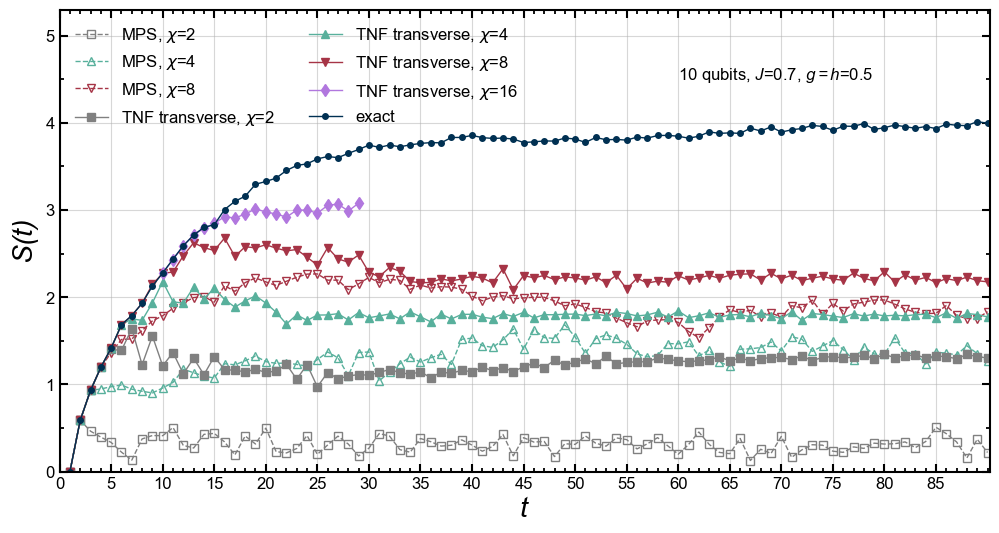

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.rm'] = 'Arial:italic'
# mathtext change to stix math font
# plt.rcParams['mathtext.bf'] = 'stix:italic'
plt.rcParams['mathtext.it'] = 'stix:italic'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.sf'] = 'Arial:italic'
plt.rcParams['mathtext.tt'] = 'Arial'
plt.rcParams['font.family'] = 'Arial'


J=0.7
g=0.5
h=0.5
n=10

total_depth = 90

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_data = TNfunc_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

# exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# # TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

# exact_data = exact_file.readlines()
# mps_data = mps_file.readlines()
# # TNfunc_data = TNfunc_file.readlines()
# TNfunc_y_data = TNfunc_y_file.readlines()
color_list = ['#808080','#58B09C','#A63446','#B177DE']
marker_list = ['s','^','v','d']

chi_mps_list = [2, 4, 8]
chi_func_list = [2, 4, 8, 16]
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax.plot(depth, S_A, label=r'MPS, $\mathbf{\chi}$' + f'={chi_mps}', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker=marker_list[chi_mps_list.index(chi_mps)], linewidth=1.0, markersize=6,markerfacecolor='none')
# ax. plot([], [], label=' ', linestyle='none', marker='none')
# for chi_func in chi_func_list:
#     TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
#     # sort the data by depth
#     TNfunc_depth_entropy.sort(key=lambda x: x[0])
#     depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[1].plot(depth, S_A, label=f'TNF inverse, $\chi={chi_func}$', linewidth=1.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=6, linestyle='--')
for chi_func in chi_func_list:
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    # sort the data by depth
    TNfunc_y_depth_entropy.sort(key=lambda x: x[0])
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax.plot(depth, S_A, label=r'TNF transverse, $\mathbf{\chi}$' + f'={chi_func}', linewidth=1.0, color=color_list[chi_func_list.index(chi_func)], marker=marker_list[chi_func_list.index(chi_func)], markersize=6)
# exact
exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
depth, S_A = zip(*exact_depth_entropy)
ax.plot(depth, S_A, label='exact', linestyle='-', color='#003052',marker='o', linewidth=1.0, markersize=4)

ax.minorticks_on()
for axi in [ax]:
    axi.set_ylabel(r'$\it{S(t)}$', fontsize=20, labelpad=30)
    axi.yaxis.set_label_position("left")
    axi.yaxis.set_label_coords(-0.02, 0.5)
    axi.set_xlabel(r'$t$', fontsize=20)
    axi.set_xticks(list(range(0, total_depth, 5)))
    axi.set_yticks(list(range(8)))
    # axi.set_yticklabels(['','',2,'',4,''])
    axi.tick_params(axis='x', labelsize=15)

    # set axis thickness
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

    axi.set_xlim(0, total_depth+0.2)
    axi.set_ylim(0, 5.3)
    axi.grid()
    axi.legend(ncol=2,frameon=False,loc='upper left',fontsize=12,)
    
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both',          # Apply changes to both x and y axes
               direction='in',       # Set ticks to face inward
               length=6,             # Tick length in points
               width=1.5,              # Tick width in points
            #    colors='b',           # Color of the ticks
            #    grid_color='r',       # Color of the gridlines
               grid_alpha=0.5,       # Transparency of gridlines
               right=True,           
               top=True,
               labelsize=12          
)
ax.tick_params(axis='both', which='minor', length=3, width=1.3, color='black', direction='in', right=True, top=True)

# add text
ax.text(2/3 * len(depth), 4.5, r'10 qubits, $\mathit{J}$=0.7, $\mathit{g=h}$=0.5', fontsize=12)


# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

# plt.savefig(f'longer_time_n=10_less_chaotic.pdf', bbox_inches='tight',dpi=300)
plt.show()

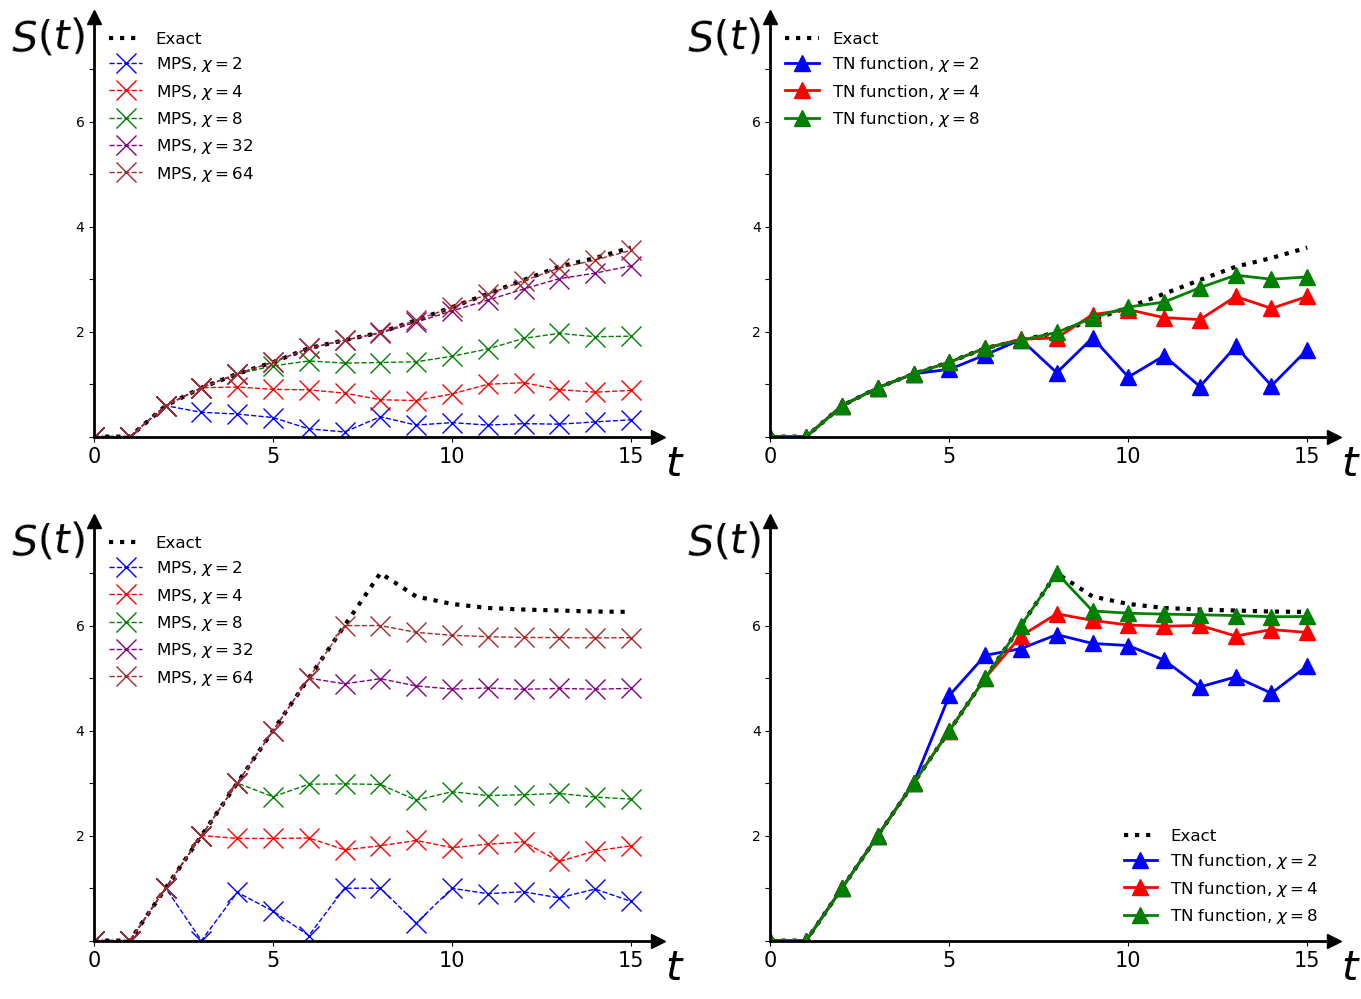

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))


J=np.pi/4
g=np.pi/4
h=0.5
n=14

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mps_list = [2, 4, 8, 32,64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[1][0].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax[1][0].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

# TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[1][1].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    # TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    # depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[1][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax[1][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)

"""======================================================================================================="""

J=0.7
g=0.5
h=0.5
n=14

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mps_list = [2, 4, 8, 32,64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[0][0].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax[0][0].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')


exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

# TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# exact
depth, S_A = zip(*exact_depth_entropy)
ax[0][1].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    # TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    # depth, S_A = zip(*TNfunc_depth_entropy)
    # ax[0][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    ax[0][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)


for _ in range(2):
    for axi in ax[_][:]:
        axi.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
        axi.yaxis.set_label_position("left")
        axi.yaxis.set_label_coords(-0.08, 0.9)
        axi.set_xlabel(r'$t$', fontsize=30)
        axi.xaxis.set_label_coords(1.03, -0.02)
        axi.set_xticks([0, 5, 10, 15])
        axi.set_yticks(list(range(8)))
        axi.set_yticklabels(['','',2,'',4,'',6,''])
        axi.tick_params(axis='x', labelsize=15)

        # x axis just arrow, no ticks
        # axi.set_xticks([])
        # axi.set_yticks([])
        # axis width
        axi.spines['bottom'].set_linewidth(2)
        axi.spines['left'].set_linewidth(2)
        # axi.spines['bottom'].set_position(('data', 0))
        # axi.spines['bottom'].set_bounds(0, 30)
        # axi.spines['left'].set_bounds(0, 5.5)
        # add arrow to the right end of x axis
        axi.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=axi.get_yaxis_transform(), clip_on=False)
        axi.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=axi.get_xaxis_transform(), clip_on=False)

        # frameless
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_position(('data', 0))
        axi.spines['bottom'].set_position(('data', 0))
        axi.set_xlim(0, 15.75)
        axi.set_ylim(0, 8)


ax[0][0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[0][1].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[1][0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[1][1].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), ncol=1, fontsize=12, frameon=False)


# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

plt.savefig(f'compare_n=14_transverse.pdf', bbox_inches='tight',dpi=300)
plt.show()

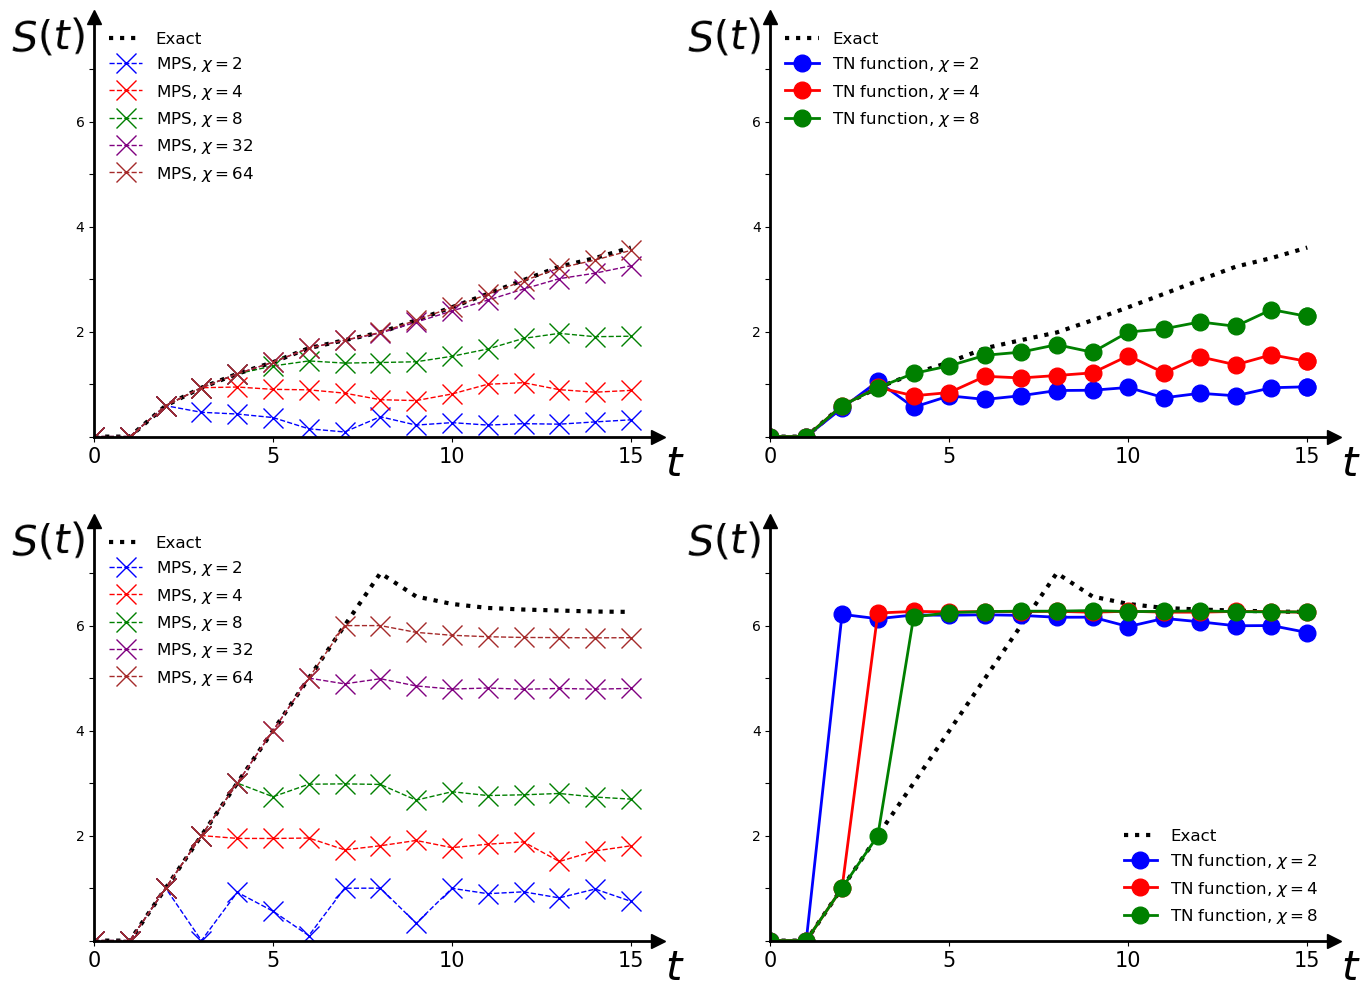

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))


J=np.pi/4
g=np.pi/4
h=0.5
n=14

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mps_list = [2, 4, 8, 32,64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[1][0].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax[1][0].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[1][1].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_depth_entropy)
    ax[1][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    # ax[1][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)

"""======================================================================================================="""

J=0.7
g=0.5
h=0.5
n=14

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mps_list = [2, 4, 8, 32,64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax[0][0].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mps in chi_mps_list:
    mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi_mps)
    depth, S_A = zip(*mps_depth_entropy)
    ax[0][0].plot(depth, S_A, label=f'MPS, $\chi={chi_mps}$', linestyle='--', color=color_list[chi_mps_list.index(chi_mps)], marker='x', linewidth=1.0, markersize=15)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')


exact_data = exact_file.readlines()
mps_data = mps_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# exact
depth, S_A = zip(*exact_depth_entropy)
ax[0][1].plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_depth_entropy)
    ax[0][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    # ax[0][1].plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)


for _ in range(2):
    for axi in ax[_][:]:
        axi.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
        axi.yaxis.set_label_position("left")
        axi.yaxis.set_label_coords(-0.08, 0.9)
        axi.set_xlabel(r'$t$', fontsize=30)
        axi.xaxis.set_label_coords(1.03, -0.02)
        axi.set_xticks([0, 5, 10, 15])
        axi.set_yticks(list(range(8)))
        axi.set_yticklabels(['','',2,'',4,'',6,''])
        axi.tick_params(axis='x', labelsize=15)

        # x axis just arrow, no ticks
        # axi.set_xticks([])
        # axi.set_yticks([])
        # axis width
        axi.spines['bottom'].set_linewidth(2)
        axi.spines['left'].set_linewidth(2)
        # axi.spines['bottom'].set_position(('data', 0))
        # axi.spines['bottom'].set_bounds(0, 30)
        # axi.spines['left'].set_bounds(0, 5.5)
        # add arrow to the right end of x axis
        axi.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=axi.get_yaxis_transform(), clip_on=False)
        axi.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=axi.get_xaxis_transform(), clip_on=False)

        # frameless
        axi.spines['top'].set_visible(False)
        axi.spines['right'].set_visible(False)
        axi.spines['left'].set_position(('data', 0))
        axi.spines['bottom'].set_position(('data', 0))
        axi.set_xlim(0, 15.75)
        # axi.set_ylim(0, 5.75)
        axi.set_ylim(0, 8)


ax[0][0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[0][1].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[1][0].legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
ax[1][1].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), ncol=1, fontsize=12, frameon=False)


# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

plt.savefig(f'compare_n=14_inverse.pdf', bbox_inches='tight',dpi=300)
plt.show()

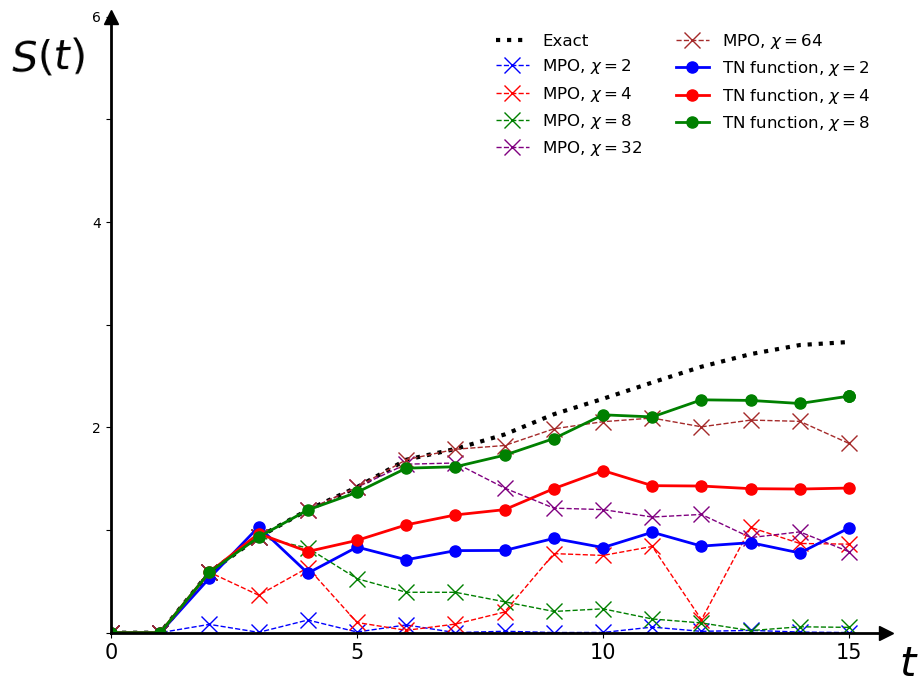

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))


J=0.7
g=0.5
h=0.5
n=10

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mpo_data = mpo_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mpo_list = [2, 4, 8, 32, 64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mpo in chi_mpo_list:
    mpo_depth_entropy = extract_depth_entropy(mpo_data, total_depth, chi=chi_mpo)
    depth, S_A = zip(*mpo_depth_entropy)
    ax.plot(depth, S_A, label=f'MPO, $\chi={chi_mpo}$', linestyle='--', color=color_list[chi_mpo_list.index(chi_mpo)], marker='x', linewidth=1.0, markersize=12)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mpo_data = mpo_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# exact
depth, S_A = zip(*exact_depth_entropy)
# ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_depth_entropy)
    ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=8)
    
    # TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    # depth, S_A = zip(*TNfunc_y_depth_entropy)
    # ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)

# """======================================================================================================="""

# J=0.7
# g=0.5
# h=0.5
# n=14

# total_depth = 15

# exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

# exact_data = exact_file.readlines()
# mpo_data = mpo_file.readlines()
# TNfunc_y_data = TNfunc_y_file.readlines()

# exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# # plot the entanglement entropy dynamics
# chi_mpo_list = [2, 4, 8, 32,64]
# # make sure the colors for same chi are the same, and distinguishable for different chi
# color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# # exact
# depth, S_A = zip(*exact_depth_entropy)
# ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
# for chi_mpo in chi_mpo_list:
#     mpo_depth_entropy = extract_depth_entropy(mpo_data, total_depth, chi=chi_mpo)
#     depth, S_A = zip(*mpo_depth_entropy)
#     ax.plot(depth, S_A, label=f'MPO, $\chi={chi_mpo}$', linestyle='--', color=color_list[chi_mpo_list.index(chi_mpo)], marker='x', linewidth=1.0, markersize=15)

# exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')


# exact_data = exact_file.readlines()
# mpo_data = mpo_file.readlines()
# TNfunc_y_data = TNfunc_y_file.readlines()

# # TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
# # TNfunc_data = TNfunc_file.readlines()

# exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# # exact
# depth, S_A = zip(*exact_depth_entropy)
# ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

# chi_func_list = [2, 4, 8]
# for chi_func in chi_func_list:
#     # TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
#     # depth, S_A = zip(*TNfunc_depth_entropy)
#     # ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=12)
    
#     TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
#     depth, S_A = zip(*TNfunc_y_depth_entropy)
#     ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)


for axi in [ax]:
    axi.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
    axi.yaxis.set_label_position("left")
    axi.yaxis.set_label_coords(-0.08, 0.9)
    axi.set_xlabel(r'$t$', fontsize=30)
    axi.xaxis.set_label_coords(1.03, -0.02)
    axi.set_xticks([0, 5, 10, 15])
    axi.set_yticks(list(range(8)))
    axi.set_yticklabels(['','',2,'',4,'',6,''])
    axi.tick_params(axis='x', labelsize=15)

    # x axis just arrow, no ticks
    # axi.set_xticks([])
    # axi.set_yticks([])
    # axis width
    axi.spines['bottom'].set_linewidth(2)
    axi.spines['left'].set_linewidth(2)
    # axi.spines['bottom'].set_position(('data', 0))
    # axi.spines['bottom'].set_bounds(0, 30)
    # axi.spines['left'].set_bounds(0, 5.5)
    # add arrow to the right end of x axis
    axi.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=axi.get_yaxis_transform(), clip_on=False)
    axi.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=axi.get_xaxis_transform(), clip_on=False)

    # frameless
    axi.spines['top'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_position(('data', 0))
    axi.spines['bottom'].set_position(('data', 0))
    axi.set_xlim(0, 15.75)
    axi.set_ylim(0, 6)


# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=3, fontsize=12, frameon=False)
ax.legend(ncol=2, fontsize=12, frameon=False)
# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
# ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), ncol=1, fontsize=12, frameon=False)


# plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

# plt.savefig(f'compare_n=10_inverse_1.pdf', bbox_inches='tight',dpi=300)
plt.show()

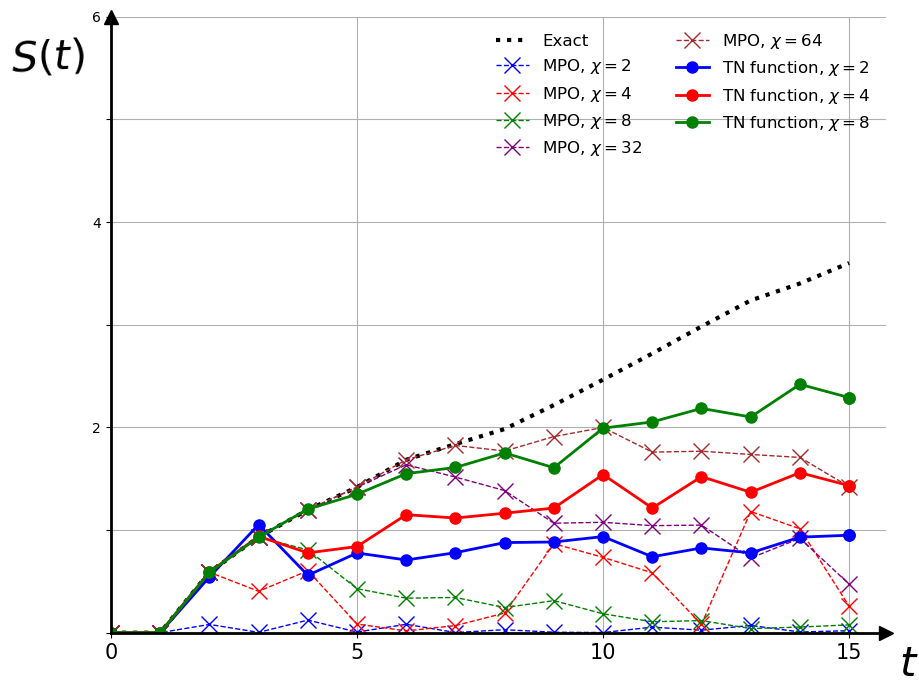

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))


J=0.7
g=0.5
h=0.5
n=14

total_depth = 15

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mpo_data = mpo_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)

# plot the entanglement entropy dynamics
chi_mpo_list = [2, 4, 8, 32, 64]
# make sure the colors for same chi are the same, and distinguishable for different chi
color_list = ['blue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# exact
depth, S_A = zip(*exact_depth_entropy)
ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)
for chi_mpo in chi_mpo_list:
    mpo_depth_entropy = extract_depth_entropy(mpo_data, total_depth, chi=chi_mpo)
    depth, S_A = zip(*mpo_depth_entropy)
    ax.plot(depth, S_A, label=f'MPO, $\chi={chi_mpo}$', linestyle='--', color=color_list[chi_mpo_list.index(chi_mpo)], marker='x', linewidth=1.0, markersize=12)

exact_file = open(f'./exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mpo_file = open(f'./MPO_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_file = open(f'./TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')

exact_data = exact_file.readlines()
mpo_data = mpo_file.readlines()
TNfunc_y_data = TNfunc_y_file.readlines()

TNfunc_file = open(f'./TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_data = TNfunc_file.readlines()

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
# exact
depth, S_A = zip(*exact_depth_entropy)
# ax.plot(depth, S_A, label='Exact', linestyle=':', color='black', linewidth=3.0)

chi_func_list = [2, 4, 8]
for chi_func in chi_func_list:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_depth_entropy)
    ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='o', markersize=8)
    
    TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=chi_func)
    depth, S_A = zip(*TNfunc_y_depth_entropy)
    # ax.plot(depth, S_A, label=f'TN function, $\chi={chi_func}$', linewidth=2.0, color=color_list[chi_func_list.index(chi_func)], marker='^', markersize=12)


for axi in [ax]:
    axi.set_ylabel(r'$S(t)$', fontsize=30, rotation=np.pi, labelpad=30)
    axi.yaxis.set_label_position("left")
    axi.yaxis.set_label_coords(-0.08, 0.9)
    axi.set_xlabel(r'$t$', fontsize=30)
    axi.xaxis.set_label_coords(1.03, -0.02)
    axi.set_xticks([0, 5, 10, 15])
    axi.set_yticks(list(range(8)))
    axi.set_yticklabels(['','',2,'',4,'',6,''])
    axi.tick_params(axis='x', labelsize=15)

    # x axis just arrow, no ticks
    # axi.set_xticks([])
    # axi.set_yticks([])
    # axis width
    axi.spines['bottom'].set_linewidth(2)
    axi.spines['left'].set_linewidth(2)
    # axi.spines['bottom'].set_position(('data', 0))
    # axi.spines['bottom'].set_bounds(0, 30)
    # axi.spines['left'].set_bounds(0, 5.5)
    # add arrow to the right end of x axis
    axi.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=axi.get_yaxis_transform(), clip_on=False)
    axi.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=axi.get_xaxis_transform(), clip_on=False)

    # frameless
    axi.spines['top'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.spines['left'].set_position(('data', 0))
    axi.spines['bottom'].set_position(('data', 0))
    axi.set_xlim(0, 15.75)
    axi.set_ylim(0, 6)


# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=3, fontsize=12, frameon=False)
ax.legend(ncol=2, fontsize=12, frameon=False)
# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
# ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0), ncol=1, fontsize=12, frameon=False)
# ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), ncol=1, fontsize=12, frameon=False)


plt.grid()
# fig.suptitle(f'$h={h}$', fontsize=20)

# plt.savefig(f'compare_n=10_inverse_1.pdf', bbox_inches='tight',dpi=300)
plt.show()